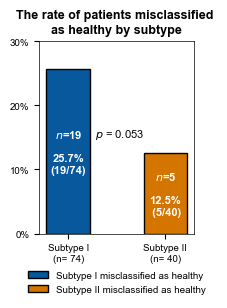

In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 设置 Nature 标准绘图参数
plt.rcParams.update({
    'font.family': 'Arial',        # 使用标准学术字体
    'font.size': 8,                # 基础字号
    'axes.titlesize': 9,           # 标题字号
    'axes.labelsize': 8,           # 轴标签字号
    'xtick.labelsize': 7,
    'ytick.labelsize': 7,
    'legend.fontsize': 7,
    'axes.linewidth': 0.5          # 坐标轴线宽
})

# 定义色盲友好调色板
color_subtype1 = '#08589e'  # 亚型 I 用蓝色
color_subtype2 = '#D47500'  # 亚型 II 用橙色

misclass_rate_subtype1 = 0.2568
misclass_rate_subtype2 = 0.1250
misclass_count_subtype1 = 19
misclass_count_subtype2 = 5

# 计算总人数
total_subtype1 = int(misclass_count_subtype1 / misclass_rate_subtype1 + 0.5)  # 四舍五入
total_subtype2 = int(misclass_count_subtype2 / misclass_rate_subtype2 + 0.5)  # 四舍五入

# p 值信息（从日志获取）
p_value_subtype = '0.053'

# 创建图表对象
fig, ax = plt.subplots(figsize=(2, 2.5))

# 设置标题
ax.set_title('The rate of patients misclassified \nas healthy by subtype',
             fontweight='bold', fontsize=9, pad=6)

x_positions = [0, 1]

# 在 x=0 绘制亚型 I
bar1 = ax.bar(x_positions[0], misclass_rate_subtype1, width=0.45, color=color_subtype1,
              edgecolor='black', linewidth=1)
# 在 x=1 绘制亚型 II
bar2 = ax.bar(x_positions[1], misclass_rate_subtype2, width=0.45, color=color_subtype2,
              edgecolor='black', linewidth=1)

# 在条形图中添加数据标签（显示误判数量和误判率），文字水平放置
ax.text(x_positions[0], misclass_rate_subtype1/2,
        f'$n$={misclass_count_subtype1:.0f}\n\n{misclass_rate_subtype1:.1%}\n(19/74)',
        ha='center', va='center', color='white', fontsize=8, fontweight='bold')
ax.text(x_positions[1], misclass_rate_subtype2/2,
        f'$n$={misclass_count_subtype2:.0f}\n\n{misclass_rate_subtype2:.1%}\n (5/40)',
        ha='center', va='center', color='white', fontsize=8, fontweight='bold')

ax.set_ylim(0, 0.3)
ax.set_yticks([0, 0.1, 0.2, 0.3])
ax.set_yticklabels(['0%', '10%', '20%', '30%'])

ax.set_xticks(x_positions)
ax.set_xticklabels([f'Subtype I\n(n= {total_subtype1})', f'Subtype II\n(n= {total_subtype2})'])

# 在条形图上方添加 p 值注释
ax.text(0.53, 0.15, f'$p$ = {p_value_subtype}', ha='center', fontsize=8)

legend_elements = [
    mpl.patches.Patch(facecolor=color_subtype1, edgecolor='black', label='Subtype I misclassified as healthy'),
    mpl.patches.Patch(facecolor=color_subtype2, edgecolor='black', label='Subtype II misclassified as healthy')
]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.15),
          frameon=False, ncol=1)

# 设置坐标轴边框样式
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(0.5)

plt.savefig('misclassification_followup_by_subtype_vertical.jpg', bbox_inches='tight', dpi=1200)
plt.show()